In [10]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,StandardScaler
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn_features.transformers import DataFrameSelector
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,accuracy_score,confusion_matrix,mean_squared_error,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.linear_model import LogisticRegression
from PIL import Image

os.makedirs('models', exist_ok=True)



Data Preoaration

In [2]:


# Load the dataset (replace 'file.csv' with your dataset's file path)
path=os.path.join(os.getcwd(),'data/P1_Churn_Modelling.csv')
# data = pd.read_csv('./data/P1_Churn_Modelling.csv')
data=pd.read_csv(path);
data


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Drop unimportant columns


In [3]:
data.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)
data# they are unique , so they are not important

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
#data input and output
## To features and target
X = data.drop(columns=['Exited'], axis=1)
y = data['Exited']

## Split to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=45, stratify=y)




In [ ]:
# #feature engineering
# data['Product_Engagement'] = data['NumOfProducts'] * (data['IsActiveMember'] + 1)
# data['Balance_Salary_Ratio'] = data['Balance'] / (data['EstimatedSalary'] + 1)
# data['Age_Tenure'] = data['Age'] * data['Tenure']


In [45]:

# Get dataset info
print(data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int64  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_Germany  10000 non-null  bool   
 11  Geography_Spain    10000 non-null  bool   
dtypes: bool(2), float64(2), int64(8)
memory usage: 800.9 KB
None


In [21]:
# Get basic statistics of numerical columns
print(data.describe())


        CreditScore        Gender           Age        Tenure       Balance  \
count  1.000000e+04  10000.000000  1.000000e+04  10000.000000  1.000000e+04   
mean  -4.824585e-16      0.545700  2.318146e-16      5.012800 -6.252776e-17   
std    1.000050e+00      0.497932  1.000050e+00      2.892174  1.000050e+00   
min   -3.109504e+00      0.000000 -1.994969e+00      0.000000 -1.225848e+00   
25%   -6.883586e-01      0.000000 -6.600185e-01      3.000000 -1.225848e+00   
50%    1.522218e-02      1.000000 -1.832505e-01      5.000000  3.319639e-01   
75%    6.981094e-01      1.000000  4.842246e-01      7.000000  8.199205e-01   
max    2.063884e+00      1.000000  5.061197e+00     10.000000  2.795323e+00   

       NumOfProducts    HasCrCard  IsActiveMember  EstimatedSalary  \
count   10000.000000  10000.00000    10000.000000     1.000000e+04   
mean        1.530200      0.70550        0.515100    -2.877698e-17   
std         0.581654      0.45584        0.499797     1.000050e+00   
min     

In [ ]:
# View the shape of the dataset
print("Dataset shape:", data.shape)

Dataset shape: (10000, 15)


In [6]:
#data processing pipeline 
#imputing null values

num_cols = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary']
categ_cols = ['Gender', 'Geography']
#get the lift columns 
ready_cols = list(set(X_train.columns.tolist()) - set(num_cols) - set(categ_cols))


## For Numerical
num_pipeline = Pipeline(steps=[
                        ('selector', DataFrameSelector(num_cols)),
                        ('imputer', SimpleImputer(strategy='median')),
                        ('scaler', StandardScaler())
                    ])


## For Categorical
categ_pipeline = Pipeline(steps=[
                        ('selector', DataFrameSelector(categ_cols)),
                        ('imputer', SimpleImputer(strategy='most_frequent')),
                        ('ohe', OneHotEncoder(drop='first', sparse_output=False))#one hot encoding
                    ])


## For ready cols
ready_pipeline = Pipeline(steps=[
                        ('selector', DataFrameSelector(ready_cols)),
                        ('imputer', SimpleImputer(strategy='most_frequent'))
                    ])



## combine all
all_pipeline = FeatureUnion(transformer_list=[
                                    ('numerical', num_pipeline),
                                    ('categorical', categ_pipeline),
                                    ('ready', ready_pipeline)
                                ])

## apply
X_train_final = all_pipeline.fit_transform(X_train)
X_test_final = all_pipeline.transform(X_test)

Impalancing

In [7]:
## 1. use algorithm without taking the effect of imbalancing


## 2. prepare class_weights for solving imbalance dataset
vals_count = 1 - (np.bincount(y_train) / len(y_train))
vals_count = vals_count / np.sum(vals_count)  ## normalizing


dict_weights = {}
for i in range(2):  ## 2 classes (0, 1)
    dict_weights[i] = vals_count[i]

## 3. Using SMOTE for over sampling
over = SMOTE(sampling_strategy=0.7)
X_train_resmapled, y_train_resampled = over.fit_resample(X_train_final, y_train)


In [13]:
pip install  dvc dvc-gdrive


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached rsa-4.9-py3-none-any.whl.metadata (4.2 kB)
   ---------------------------------------- 0.0/600.3 kB ? eta -:--:--
   ---------------------------------------- 600.3/600.3 kB 3.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/13.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/13.1 MB 4.2 MB/s eta 0:00:03
   ---- ----------------------------------- 1.6/13.1 MB 3.8 MB/s eta 0:00:04
   ------- -------------------------------- 2.4/13.1 MB 3.7 MB/s eta 0:00:03
   -------- ------------------------------- 2.9/13.1 MB 3.8 MB/s eta 0:00:03
   ----------- ---------------------------- 3.7/13.1 MB 3.8 MB/s eta 0:00:03
   -------------- ------------------------- 4.7/13.1 MB 3.8 MB/s eta 0:00:03
   ---------------- ----------------------- 5.5/13.1 MB 3.8 MB/s eta 0:00:02
   ------------------- -------------------- 6.3/13.1 MB 3.8 MB/s eta 0:00:02
   

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.13 requires numpy<2,>=1.24.4, but you have numpy 2.0.2 which is incompatible.
albumentations 1.4.10 requires numpy<2,>=1.24.4, but you have numpy 2.0.2 which is incompatible.
paddleocr 2.9.1 requires numpy<2.0, but you have numpy 2.0.2 which is incompatible.
paddlepaddle-gpu 2.6.2 requires protobuf<=3.20.2,>=3.1.0; platform_system == "Windows", but you have protobuf 5.29.3 which is incompatible.


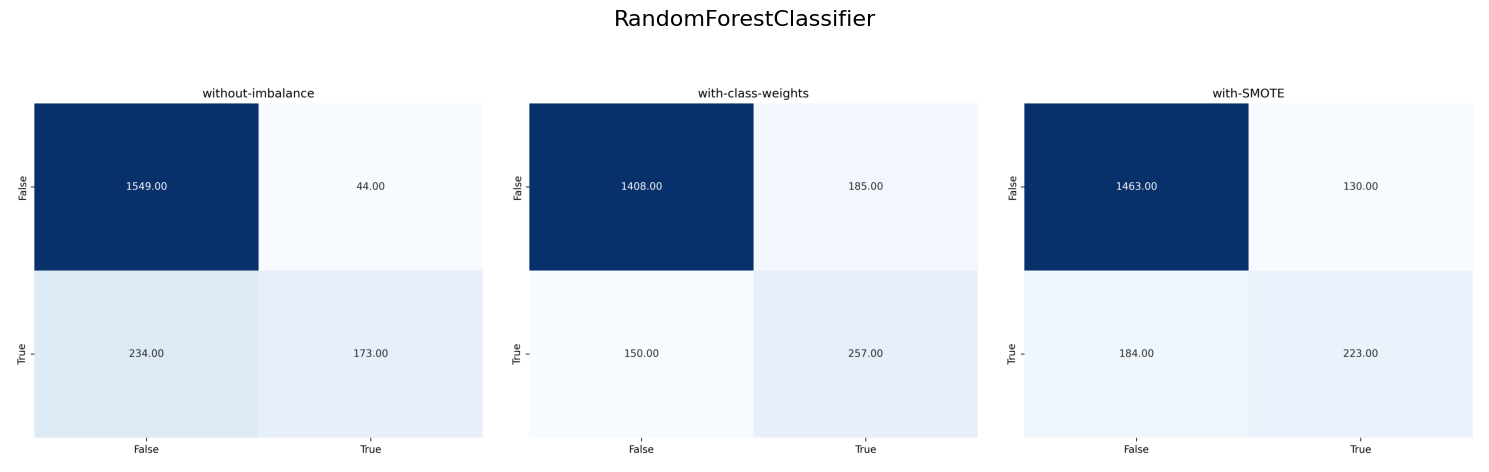

In [11]:
with open('metrics.txt', 'w') as f:
    pass


def train_model(X_train, y_train, plot_name='', class_weight=None):    
    global clf_name

    clf = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=45, class_weight=class_weight)
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test_final)
    
    score_train = f1_score(y_train, y_pred_train)
    score_test = f1_score(y_test, y_pred_test)
    
    clf_name = clf.__class__.__name__

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cbar=False, fmt='.2f', cmap='Blues')
    plt.title(f'{plot_name}')
    plt.xticks(ticks=np.arange(2) + 0.5, labels=[False, True])
    plt.yticks(ticks=np.arange(2) + 0.5, labels=[False, True])

    ## Save the plot locally
    plt.savefig(f'{plot_name}.png', bbox_inches='tight', dpi=300)
    plt.close()


    ## Write scores to a file
    with open('metrics.txt', 'a') as f:
            f.write(f'{clf_name} {plot_name}\n')
            f.write(f"F1-score of Training is: {score_train*100:.2f} %\n")
            f.write(f"F1-Score of Validation is: {score_test*100:.2f} %\n")
            f.write('----'*10 + '\n')
    joblib.dump(clf, os.path.join(os.getcwd(), 'models', f'{clf_name}-{plot_name}.pkl'))


    return True


## 1 without  imabalancing data
train_model(X_train=X_train_final, y_train=y_train, plot_name='without-imbalance', class_weight=None)

## 2 with  class_weights
train_model(X_train=X_train_final, y_train=y_train, plot_name='with-class-weights', class_weight=dict_weights)

## 3 with  (SMOTE)
train_model(X_train=X_train_resmapled, y_train=y_train_resampled, plot_name=f'with-SMOTE', class_weight=None)



## Combine all conf matrix in one
confusion_matrix_paths = [f'./without-imbalance.png', f'./with-class-weights.png', f'./with-SMOTE.png']

plt.figure(figsize=(15, 5))  
for i, path in enumerate(confusion_matrix_paths, 1):
    img = Image.open(path)
    plt.subplot(1, len(confusion_matrix_paths), i)
    plt.imshow(img)
    plt.axis('off')  


## Save combined plot locally
plt.suptitle(clf_name, fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(f'conf_matrix.png', bbox_inches='tight', dpi=300)

## Delete old image files
for path in confusion_matrix_paths:
    os.remove(path)

In [16]:
!dvc init

Initialized DVC repository.

You can now commit the changes to git.

+---------------------------------------------------------------------+
|                                                                     |
|        DVC has enabled anonymous aggregate usage analytics.         |
|     Read the analytics documentation (and how to opt-out) here:     |
|             <https://dvc.org/doc/user-guide/analytics>              |
|                                                                     |
+---------------------------------------------------------------------+

What's next?
------------
- Check out the documentation: <https://dvc.org/doc>
- Get help and share ideas: <https://dvc.org/chat>
- Star us on GitHub: <https://github.com/iterative/dvc>


In [24]:
# !dvc add ./data/ ./models/
!dvc remote add --default myremote gdrive://1JhGEobhTe9KMndVyjbyWKsg2w8YGg4SN
# dvc push
# dvc status
# dvc doctor
# !git rm -r --cached data
# !git commit -m 'stop tracking data'

Setting 'myremote' as a default remote.


Encoding categorical data

In [ ]:

# One-Hot Encoding for Geography
data = pd.get_dummies(data, columns=['Geography'], drop_first=True)

# Label Encoding for Gender
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,False,False
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,False,False
9997,709,0,36,7,0.00,1,0,1,42085.58,1,False,False
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,True,False


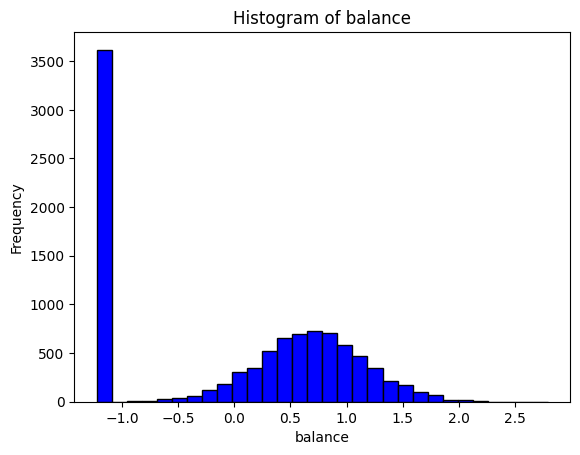

In [25]:

plt.hist(data['Balance'], bins=30, color="blue", edgecolor="black")
plt.xlabel("balance")
plt.ylabel("Frequency")
plt.title("Histogram of balance")
plt.show()

In [26]:
data[data['Balance']<0].sum()


CreditScore               -40.911491
Gender                   2210.000000
Age                      -144.257186
Tenure                  20709.000000
Balance                 -4540.536985
NumOfProducts            7106.000000
HasCrCard                2932.000000
IsActiveMember           2135.000000
EstimatedSalary           -64.449244
Exited                    611.000000
Geography_Germany         136.000000
Geography_Spain          1302.000000
Product_Engagement      10849.000000
Balance_Salary_Ratio    -8227.620416
Age_Tenure              -1247.659416
dtype: float64

In [27]:
print(data['Balance'].min()) # then boxcox() will fail if data is 0 or negative

-1.2258476714090278


In [ ]:
# import numpy as np

#data['Balance'] = np.log1p(data['Balance']) # log1p(x) = log(1 + x) 
# to avoid log(0) the skewness is larger than the bast so you needn't do that
data['Balance'].skew()


np.float64(-0.5708284896191692)

In [ ]:
# from scipy.stats import yeojohnson
# import numpy as np
# data['Balance'], lambda_value = yeojohnson(data['Balance'])  
# data['Balance'].skew()
#it is a mild skewness that doens't with the algorihtm , it needs skewness larger than 0.5


np.float64(-0.5685677962225228)

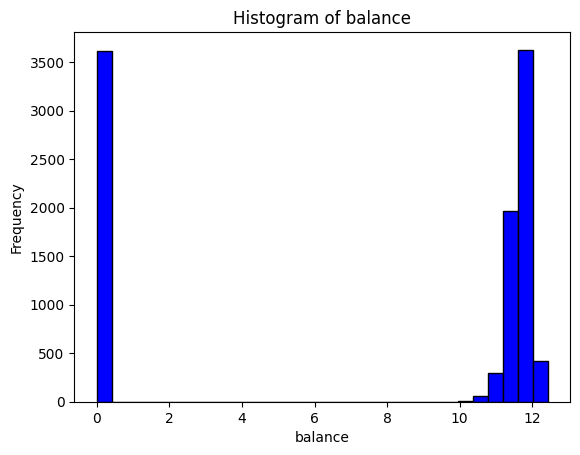

In [ ]:

plt.hist(data['Balance'], bins=30, color="blue", edgecolor="black")
plt.xlabel("balance")
plt.ylabel("Frequency")
plt.title("Histogram of balance")
plt.show()

In [ ]:
#and may be estimated salary
data['EstimatedSalary'].skew()#it is mild and perfect

np.float64(0.0020853576615585162)

In [19]:
#may be the number of products -> max and 75%
data['NumOfProducts'].skew()

np.float64(0.7455678882823168)

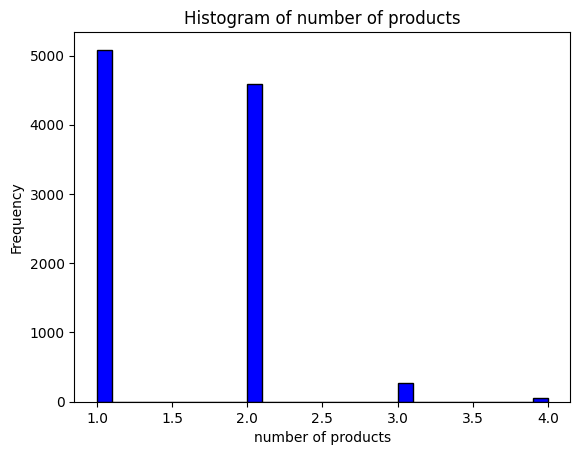

In [20]:
plt.hist(data['NumOfProducts'], bins=30, color="blue", edgecolor="black")
plt.xlabel("number of products")
plt.ylabel("Frequency")
plt.title("Histogram of number of products")
plt.show()

Products skewness


In [ ]:


from scipy.stats import yeojohnson
import numpy as np
data['NumOfProducts'], lambda_value = yeojohnson(data['NumOfProducts'])  
data['NumOfProducts'].skew()#each time you run , the value changes, i ran it four times unit become 0

np.float64(0.15128851198429175)

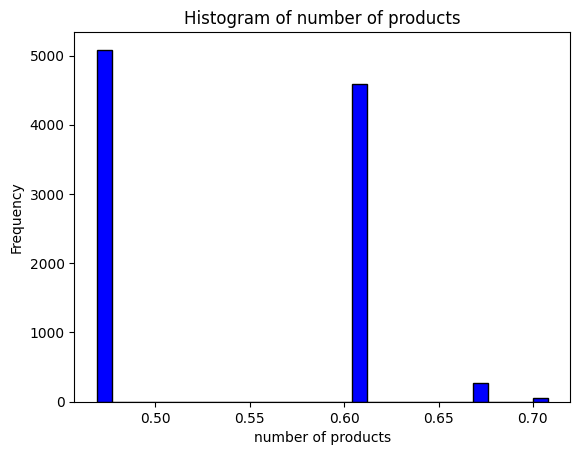

In [41]:
plt.hist(data['NumOfProducts'], bins=30, color="blue", edgecolor="black")
plt.xlabel("number of products")
plt.ylabel("Frequency")
plt.title("Histogram of number of products")
plt.show()

In [ ]:
data['NumOfProducts'] = pd.cut(data['NumOfProducts'], bins=3, labels=['small', 'Medium', 'big'])
print(data['NumOfProducts'])

data['NumOfProducts'] = pd.qcut(data['Age'], q=3, labels=['small', 'Medium', 'big'])
print(data)

0        small
1        small
2          big
3       Medium
4        small
         ...  
9995    Medium
9996     small
9997     small
9998    Medium
9999     small
Name: NumOfProducts, Length: 10000, dtype: category
Categories (3, object): ['small' < 'Medium' < 'big']
      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532 

In [ ]:
data['NumOfProducts'].min()#the value now isn't true 0.005546758022440364 after making so many transformation

0.005546758022440364

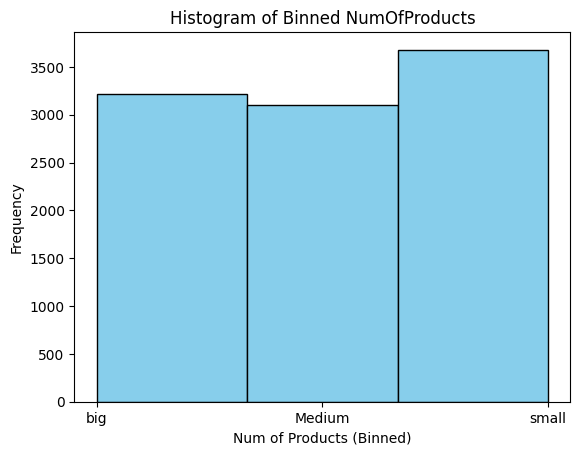

In [44]:
plt.hist(data['NumOfProducts'], bins=3, edgecolor="black", color="skyblue")
plt.xlabel("Num of Products (Binned)")
plt.ylabel("Frequency")
plt.title("Histogram of Binned NumOfProducts")
plt.show()


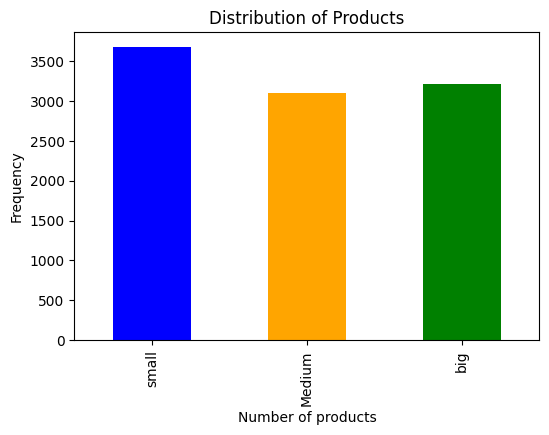

In [ ]:
bin_counts = data['NumOfProducts'].value_counts().sort_index()

# Plot the binned categories
plt.figure(figsize=(6,4))
bin_counts.plot(kind='bar', color=['blue', 'orange', 'green'])

plt.xlabel("Number of products")
plt.ylabel("Frequency")
plt.title("Distribution of Products")

plt.show()

In [12]:
data.var(numeric_only=True)

CustomerId         5.174815e+09
CreditScore        9.341860e+03
Age                1.099941e+02
Tenure             8.364673e+00
Balance            3.893436e+09
NumOfProducts      3.383218e-01
HasCrCard          2.077905e-01
IsActiveMember     2.497970e-01
EstimatedSalary    3.307457e+09
Exited             1.622225e-01
dtype: float64

Scale features


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)  # Keep 95% variance
transformed_data = pca.fit_transform(data)




In [48]:
data[data.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited



Check for duplicates


In [ ]:

duplicates = data.duplicated().sum()
print("Number of duplicate rows:", duplicates)




Number of duplicate rows: 0


In [50]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,1.00000,1.000000,199992.480000,1.000000


Remove outliers

In [25]:
def remove_outliers(data):
   
    data = data.select_dtypes(include=['number'])
    q1=data.quantile(0.25)
    #print(q1)
    q3=data.quantile(0.75)
    #print(q3)
    iqr=q3-q1
    #print(iqr)
    data[(data<(q1-1.5*iqr))|(data>(q3+1.5*iqr))]=np.nan
    data=data.dropna()
    return data

data=remove_outliers(data)  


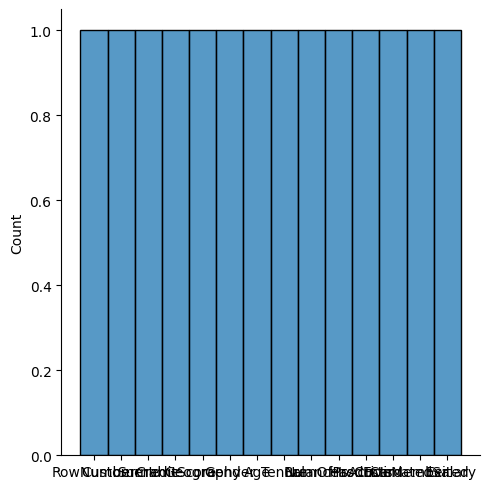

In [52]:
#sns.displot(data[''])#error
sns.displot(data.columns)#exactly

Correlation between features


<Axes: xlabel='Age', ylabel='Balance'>

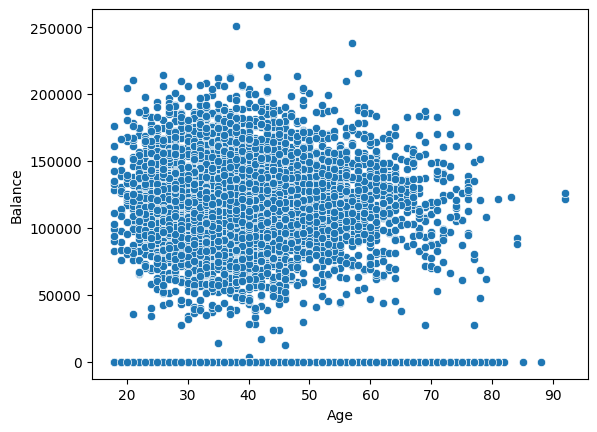

In [ ]:
sns.scatterplot(x=data['Age'], y=data['Balance'])



In [9]:
pip install cml


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
INFO: pip is looking at multiple versions of cloud-ml-sdk to determine which version is compatible with other requirements. This could take a while.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement cloud-ml-common>=0.2.2 (from cloud-ml-sdk) (from versions: 0.0.2)
ERROR: No matching distribution found for cloud-ml-common>=0.2.2


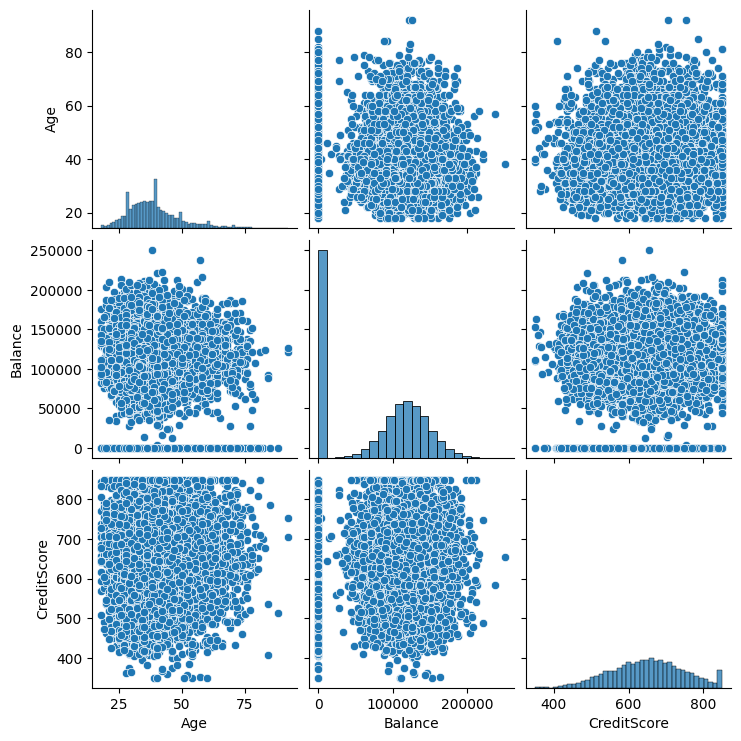

In [ ]:
sns.pairplot(data[['Age', 'Balance', 'CreditScore']])  
plt.show()

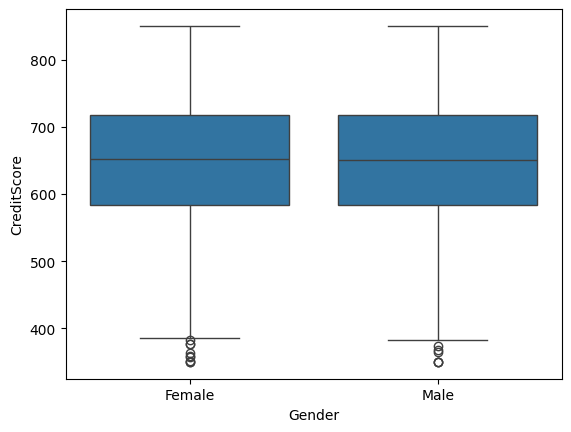

In [ ]:
sns.boxplot(x=data['Gender'], y=data['CreditScore'])#there is no bias of gender
plt.show()


Compute correlation matrix


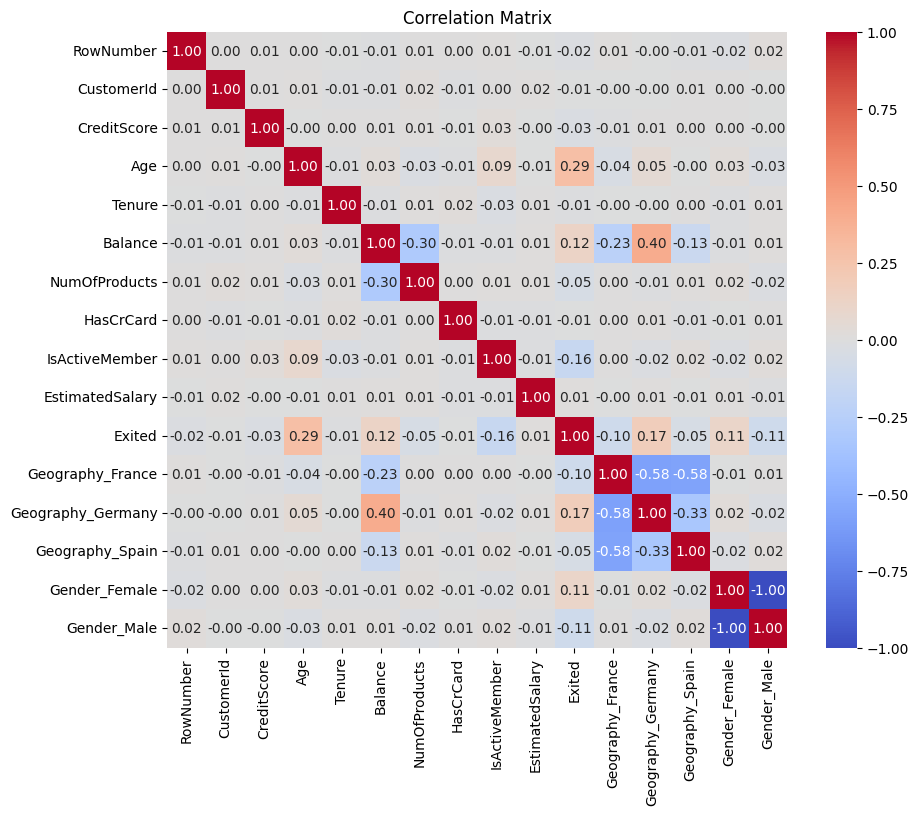

In [ ]:
correlation_matrix = data.corr()#it only works with numerical data and you have some categorical
#it doesnt works with so many features like 1000 feature 
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [6]:
#drop irrelevent columns
#gender, hascredit card, geography spain
data.drop(columns=['Gender','HasCrCard','Geography_Spain'],inplace=True)
data

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,Geography_Germany
0,1,15634602,Hargrave,619,42,2,0.00,1,1,101348.88,1,False
1,2,15647311,Hill,608,41,1,83807.86,1,1,112542.58,0,False
2,3,15619304,Onio,502,42,8,159660.80,3,0,113931.57,1,False
3,4,15701354,Boni,699,39,1,0.00,2,0,93826.63,0,False
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,79084.10,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,39,5,0.00,2,0,96270.64,0,False
9996,9997,15569892,Johnstone,516,35,10,57369.61,1,1,101699.77,0,False
9997,9998,15584532,Liu,709,36,7,0.00,1,1,42085.58,1,False
9998,9999,15682355,Sabbatini,772,42,3,75075.31,2,0,92888.52,1,True


Train test split


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train a model


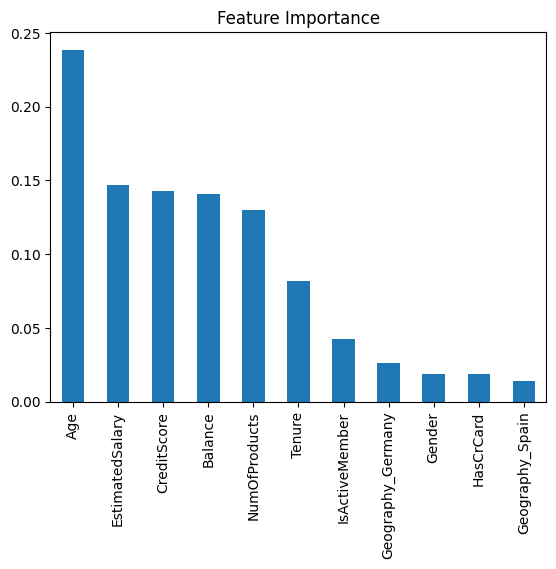

In [ ]:

model = RandomForestClassifier()
model.fit(X, y)

# Get feature importance
importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importance
importance.plot(kind='bar')
plt.title("Feature Importance")
plt.show()


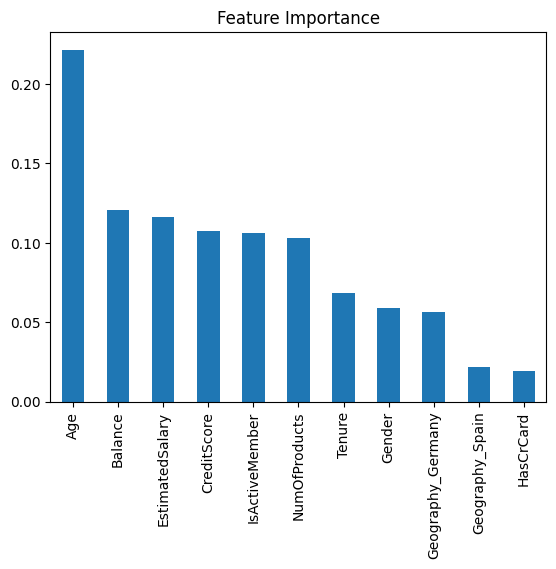

In [ ]:

model = RandomForestClassifier()
model.fit(X_resampled, y_resampled)

# Get feature importance
importance = pd.Series(model.feature_importances_, index=X_resampled.columns).sort_values(ascending=False)

# Plot feature importance
importance.plot(kind='bar')
plt.title("Feature Importance")
plt.show()

Choose the loss funtion either ols , absolute , hubber ,log , hinge, exponential


In [ ]:

y_pred=model.predict(X_test)


LDA

In [63]:
#accuracy score
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [ ]:

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



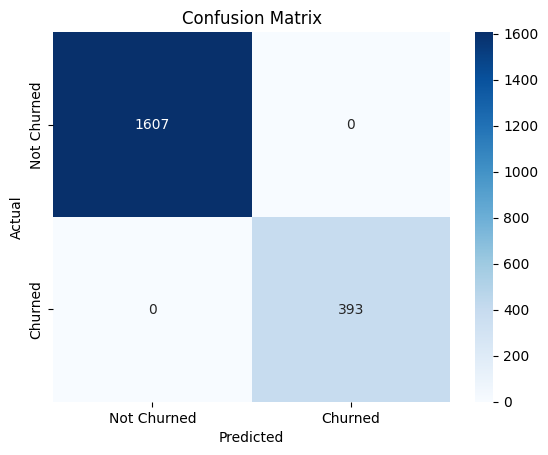

In [ ]:

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:

y_probs = model.predict_proba(X_test)[:, 1]  # Get probability of churn (class 1)
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC-AUC Score: {roc_auc:.2f}")


ROC-AUC Score: 0.85


In [ ]:

cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f}")


Cross-Validation Accuracy: 0.87


In [52]:
#error
mse=mean_squared_error(y_test,y_pred)
mse

np.float64(0.0)

In [ ]:
print(data['Exited'].value_counts(normalize=True) * 100)  # Show percentage distribution


Exited
0    79.63
1    20.37
Name: proportion, dtype: float64


<Axes: xlabel='Exited', ylabel='CreditScore'>

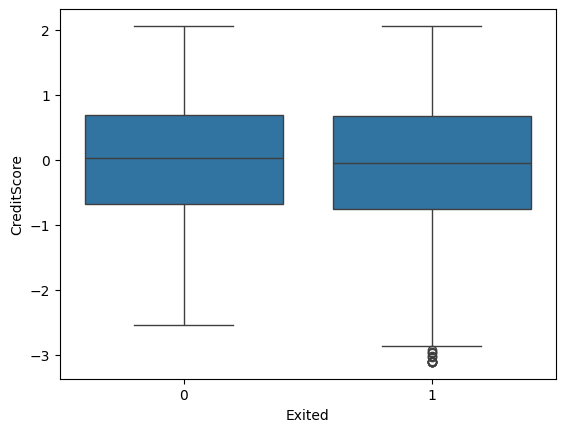

In [45]:
#check bias in credit score  and estimated salary

sns.boxplot(x='Exited', y='CreditScore', data=data)  # Check distribution per churn status


<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

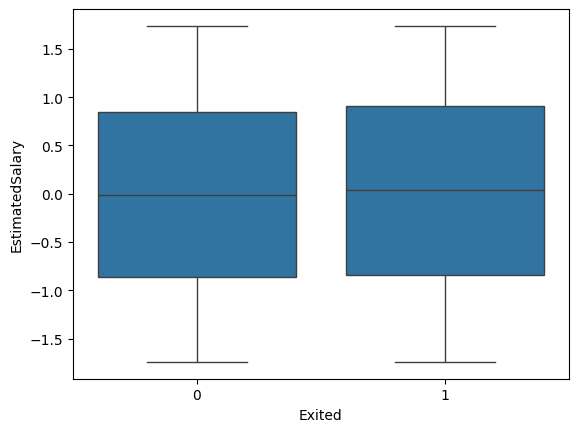

In [46]:
sns.boxplot(x='Exited', y='EstimatedSalary', data=data)


<Axes: xlabel='Exited', ylabel='Age'>

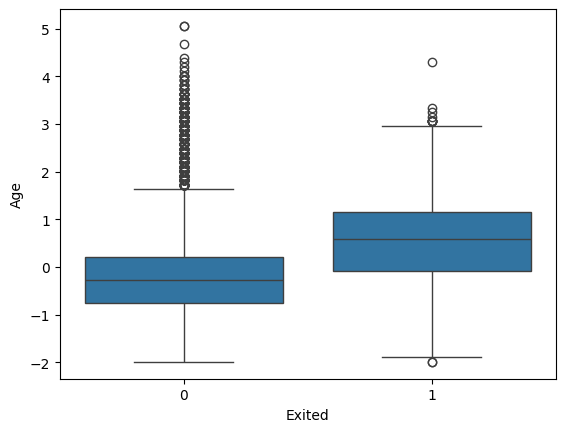

In [ ]:
#bias in age
sns.boxplot(x='Exited', y='Age', data=data)


Cross validation to split data multiple times


In [ ]:

cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-Fold CV
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


Cross-Validation Accuracy: 0.8771 ± 0.0032


Evaluate on Training Set


In [ ]:

train_predictions = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Evaluate on Test Set
test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Compare Results
if train_accuracy > test_accuracy + 0.05:  # 5% difference threshold
    print("⚠️ Overfitting Detected!")
else:
    print("✅ No major overfitting detected.")


Training Accuracy: 1.0000
Test Accuracy: 0.8270
⚠️ Overfitting Detected!


In [ ]:

# Define models
models = {
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(probability=True),  # Enable probability for ROC-AUC
    "Decision Tree": DecisionTreeClassifier()
}

# Store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict on test data
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None  # Probabilities for AUC
    print(y_pred)

# Display results
metrics_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"])
print(metrics_df)


[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[1 0 0 ... 1 0 1]
Empty DataFrame
Columns: []
Index: [Accuracy, Precision, Recall, F1-Score, ROC-AUC]
